In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import rasterio
import rasterio.features
from rasterio.mask import mask
from rasterio.plot import show
import os 
import numpy as np
from rasterstats import zonal_stats
import fiona

In [ ]:
# #br = gpd.read_file(r'Z:\- GIS -\IBGE\SC_Municipios_2020\SC_Municipios_2020.shp')
sc = gpd.read_file(r'D:\GeoBase\IBGE\SC_Municipios_2022\SC_Municipios_2022.shp')
sc[sc['NM_MUNICIPIOS']=='FLORIANÓPOLIS'].plot
# fig,ax = plt.subplots()
# #br.plot(ax=ax)

# #br[br['SIGLA_UF']=='SC'].explore()
# sc[sc['SIGLA_UF']=='SC'].explore('AREA_KM2')

In [25]:
#srtm = rasterio.open(r'Z:\- GIS -\SRTM\SRTM_SC_UTM.tif')
srtm = rasterio.open(r'D:\GeoBase\EPAGRI\SRTM\SRTM_SC_UTM_SIRGAS.tif') #SRTM_SC_UTM_SIRGAS.tif')
srtm.width


18207

In [3]:
srtm.height

12615

In [4]:
{i: dtype for i, dtype in zip(srtm.indexes, srtm.dtypes)}

{1: 'float32'}

In [5]:
srtm.bounds

BoundingBox(left=216916.3754, bottom=6750693.5841, right=763126.3754, top=7129143.5841)

In [6]:
srtm.crs

CRS.from_epsg(31982)

In [7]:
srtm.indexes

(1,)

In [8]:
band1 = srtm.read(1)
band1

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

In [9]:
 affine = srtm.transform

In [10]:
# no data values of the original raster
no_data=srtm.nodata
print(no_data)

-3.4028234663852886e+38


In [28]:
# change no data values?
# Replace nodata values with a new value (e.g., 0) new_raster_data = np.where(raster_data == nodata_value, 0, raster_data) 

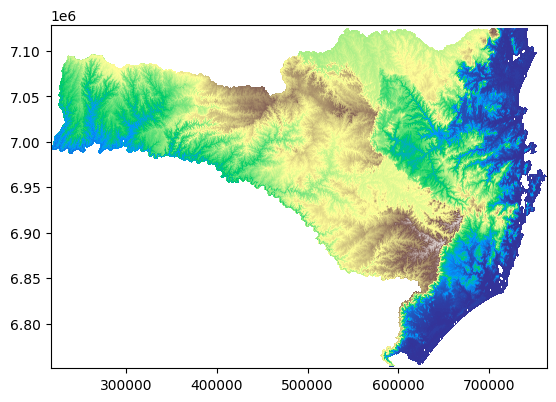

<Axes: >

In [35]:
show(srtm, cmap='terrain')#, legend = True)

In [14]:
#shape1 = gpd.read_file(r'Z:\- GIS -\IBGE\vegetacao\VG_REG_FITO_UTM_SC.shp')
shape1 = gpd.read_file(r'D:\GeoBase\IBGE\VG_REG_FITO\VG_REG_FITO_UTM.shp')
shape1.crs

<Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
# clip shapefile SC
#sc = gpd.read_file(r'Z:\- GIS -\IBGE\SC_utm.shp')
sc = gpd.read_file(r'D:\GeoBase\IBGE\SC_UTM.shp')
shape = gpd.clip(shape1 , sc)


In [16]:
#shape1.to_file(r'Z:\- GIS -\IBGE\vegetacao\VG_REG_FITO_UTM_SC_clip.shp')
shape.to_file(r'D:\GeoBase\IBGE\VG_REG_FITO\VG_REG_FITO_UTM_SC.shp')

In [222]:
# filter out empty or null geometries
#shape1 = shape1[~(shape1['geometry'].is_empty | shape1['geometry'].isna())]

In [17]:
shape.geometry

1836     MULTIPOLYGON (((581931.374 6769351.286, 582322...
1838     MULTIPOLYGON (((591021.660 6774121.950, 590912...
8929     POLYGON ((518469.326 6903296.942, 518486.194 6...
8931     POLYGON ((513950.138 6903300.205, 513884.692 6...
67444    POLYGON ((518033.974 6920068.270, 517797.437 6...
                               ...                        
9246     POLYGON ((571732.507 7117594.112, 571919.960 7...
67786    POLYGON ((536208.889 7112034.454, 536653.964 7...
49719    MULTIPOLYGON (((650933.729 7102196.771, 650920...
9247     POLYGON ((610014.079 7119595.833, 609998.966 7...
1416     MULTIPOLYGON (((740440.998 7124690.814, 740440...
Name: geometry, Length: 572, dtype: geometry

In [19]:
# define other statistics
from __future__ import division
import numpy.ma as ma

def acima1500(x):
     return np.count_nonzero(x>=1500) # so funciona para um poligono? não sei porque nao deu certo
    
# def perc1500m(x):
#     return (lambda x: ((x >= 1500).sum()) / (x.count))(x) #nao funcionou

In [ ]:
del(gdf2)

In [21]:
#srtm = rasterio.open(r'Z:\- GIS -\SRTM\SRTM_SC_UTM_.tif')
srtm = rasterio.open(r'D:\GeoBase\EPAGRI\SRTM\srtm_sc_utm_sirgas2000.tif')
#shape1 = gpd.read_file(r'Z:\- GIS -\IBGE\vegetacao\VG_REG_FITO_UTM_SC_clip.shp')
shape1  = gpd.read_file(r'D:\GeoBase\IBGE\VG_REG_FITO\VG_REG_FITO_UTM_SC.shp')

with srtm as src:
    affine = src.transform
    array = src.read(1)
    nodata = src.nodata
    df_zonal_stats = pd.DataFrame(zonal_stats(shape1, array, affine=affine, nodata=nodata, stats="count min mean max percentile_10 percentile_90 percentile_95", add_stats={'acima1500':acima1500}))  
    #, 'perc1500m':perc1500m }))

# adding statistics back to original GeoDataFrame
gdf2 = pd.concat([shape1, df_zonal_stats], axis=1) 
# change column names
gdf2 = gdf2.rename(index=str,columns={"percentile_10" : "perc10" , "percentile_90" : "perc90", "percentile_95" : "perc95"})
gdf2.columns


Index(['id', 'legenda', 'area_km', 'geometry', 'min', 'max', 'mean', 'count',
       'perc10', 'perc90', 'perc95', 'acima1500'],
      dtype='object')

In [22]:
gdf2

,id,legenda,area_km,geometry,min,max,mean,count,perc10,perc90,perc95,acima1500
0,66648,Floresta OmbrÃ³fila Mista,520.228301,"MULTIPOLYGON (((581931.374 6769351.286, 582322...",0.0,1004.0,861.893664,7307,785.0,954.0,967.00,0
1,66651,Floresta OmbrÃ³fila Mista,54.415303,"MULTIPOLYGON (((591021.660 6774121.950, 590912...",568.0,1000.0,902.458391,7282,818.0,962.0,970.00,0
2,5592,Ãgua,0.061865,"POLYGON ((518469.326 6903296.942, 518486.194 6...",968.0,985.0,976.882353,68,969.0,983.0,983.65,0
3,5594,Ãgua,0.042334,"POLYGON ((513950.138 6903300.205, 513884.692 6...",938.0,945.0,940.833333,48,939.0,944.0,944.65,0
4,66679,Floresta OmbrÃ³fila Mista,1.484666,"POLYGON ((518033.974 6920068.270, 517797.437 6...",935.0,1023.0,987.291895,1641,955.0,1014.0,1017.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
567,5907,Ãgua,0.092776,"POLYGON ((571732.507 7117594.112, 571919.960 7...",762.0,777.0,771.036697,109,767.8,774.0,775.00,0
568,67023,FormaÃ§Ã£o Pioneira,32.548209,"POLYGON ((536208.889 7112034.454, 536653.964 7...",748.0,825.0,764.151013,36116,754.0,780.0,787.00,0
569,47182,Contato,95.229493,"MULTIPOLYGON (((650933.729 7102196.771, 650920...",782.0,884.0,817.004306,35530,791.0,849.0,856.00,0
570,5908,Ãgua,0.242935,"POLYGON ((610014.079 7119595.833, 609998.966 7...",769.0,783.0,772.200000,270,770.0,775.0,776.00,0


In [23]:
#gdf2.to_file(r'C:\Users\anafranco\Documents\ENS410064\atividade03.shp')  
gdf2.to_file(r'D:\PPGEA\AulaPy\atividade03.shp')  

In [27]:
#srtm = rasterio.open(r'Z:\- GIS -\SRTM\SRTM_SC_UTM_.tif')
srtm = rasterio.open(r'D:\GeoBase\EPAGRI\SRTM\SRTM_SC_UTM_SIRGAS.tif') 
#sc = gpd.read_file(r'Z:\- GIS -\IBGE\SC_UTM.shp')
sc = gpd.read_file(r'D:\GeoBase\IBGE\SC_UTM.shp')
# calcular quanto da área de SC está acima de 1500 m 
with srtm as src:
    affine = src.transform
    array = src.read(1)
    nodata = src.nodata
    df_zonal_stats2 = pd.DataFrame(zonal_stats(sc, array, affine=affine, nodata=nodata, stats="count mean max percentile_50 percentile_90 percentile_95 percentile_99", add_stats={'acima1500':acima1500}))
    #df_zonal_stats2 = zonal_stats(sc, array, affine=affine, stats="count mean max percentile_50 percentile_90 percentile_95 percentile_99", add_stats={'acima1500':acima1500})

# adding statistics back to original GeoDataFrame
gdf3 = pd.concat([sc, df_zonal_stats2], axis=1) 
# change column names
gdf3 = gdf3.rename(index=str,columns={"percentile_50" : "perc50" , "percentile_90" : "perc90", "percentile_95" : "perc95", "percentile_99" : "perc99"})
gdf3.columns

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry',
       'max', 'mean', 'count', 'perc50', 'perc90', 'perc95', 'perc99',
       'acima1500'],
      dtype='object')

In [28]:
#srtm  = rasterio.open(r'Z:\- GIS -\SRTM\SRTM_SC_UTM_clip.tif')
srtm = rasterio.open(r'D:\GeoBase\EPAGRI\SRTM\SRTM_SC_UTM_SIRGAS.tif') 
array = srtm.read(1)
np.count_nonzero(array>=1500)

471686

In [29]:
gdf3

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,max,mean,count,perc50,perc90,perc95,perc99,acima1500
0,42,Santa Catarina,SC,Sul\n,95730.69,"MULTIPOLYGON (((676445.931 7119014.673, 676448...",1816.0,677.753854,106152523,763.0,1104.0,1211.0,1405.0,471686


In [30]:
#gdf3.to_file(r'C:\Users\anafranco\Documents\ENS410064\altitudeSC.shp')  
gdf3.to_file(r'D:\PPGEA\AulaPy\altitudeSC.shp')  


In [31]:
srtm.res

(30.0, 30.0)